# Importing Libraries

In [333]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Loading

In [334]:
df=pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [335]:
df.head() #to display first 5 rows of dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [336]:
df.tail() #to display last 5 rows of dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


# Data Preprocessing

In [337]:
df.shape #to display the rows and columns of dataset

(100000, 9)

In [338]:
df.isnull().sum() #to count the number of missing (NaN or null) values in each column of a Dataset.

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [339]:
df.info() #to provide a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [340]:
df = df.astype({'age': int}) #to change the 'age' column from object type to integer data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  int32  
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 6.5+ MB


In [341]:
#encoding categorical variables with nominal values into numerical values.
map_name={'Male':1,'Female':2,'Other':3} 
df['gender']=df['gender'].map(map_name)
print(df)

       gender  age  hypertension  heart_disease smoking_history    bmi  \
0           2   80             0              1           never  25.19   
1           2   54             0              0         No Info  27.32   
2           1   28             0              0           never  27.32   
3           2   36             0              0         current  23.45   
4           1   76             1              1         current  20.14   
...       ...  ...           ...            ...             ...    ...   
99995       2   80             0              0         No Info  27.32   
99996       2    2             0              0         No Info  17.37   
99997       1   66             0              0          former  27.83   
99998       2   24             0              0           never  35.42   
99999       2   57             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140         0  
1      

In [342]:
# One-Hot Encoder converts categorical variables into binary vectors
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
x = ohe.fit_transform(df[['smoking_history']].values).toarray()

# creating a new binary column for each category, indicating presence or absence.
df1 = pd.DataFrame(x, columns=ohe.categories_)
print(df1)

      No Info current ever former never not current
0         0.0     0.0  0.0    0.0   1.0         0.0
1         1.0     0.0  0.0    0.0   0.0         0.0
2         0.0     0.0  0.0    0.0   1.0         0.0
3         0.0     1.0  0.0    0.0   0.0         0.0
4         0.0     1.0  0.0    0.0   0.0         0.0
...       ...     ...  ...    ...   ...         ...
99995     1.0     0.0  0.0    0.0   0.0         0.0
99996     1.0     0.0  0.0    0.0   0.0         0.0
99997     0.0     0.0  0.0    1.0   0.0         0.0
99998     0.0     0.0  0.0    0.0   1.0         0.0
99999     0.0     1.0  0.0    0.0   0.0         0.0

[100000 rows x 6 columns]


In [343]:
df2 = pd.concat([df, df1], axis=1) #Combining the original DataFrame (df) and the one-hot encoded DataFrame (df1) along the columns (axis=1)
df2 = df2.drop(['smoking_history'], axis=1) #removing the original 'smoking_history'
print(df2)

       gender  age  hypertension  heart_disease    bmi  HbA1c_level  \
0           2   80             0              1  25.19          6.6   
1           2   54             0              0  27.32          6.6   
2           1   28             0              0  27.32          5.7   
3           2   36             0              0  23.45          5.0   
4           1   76             1              1  20.14          4.8   
...       ...  ...           ...            ...    ...          ...   
99995       2   80             0              0  27.32          6.2   
99996       2    2             0              0  17.37          6.5   
99997       1   66             0              0  27.83          5.7   
99998       2   24             0              0  35.42          4.0   
99999       2   57             0              0  22.43          6.6   

       blood_glucose_level  diabetes  (No Info,)  (current,)  (ever,)  \
0                      140         0         0.0         0.0      0.0   
1

# Understanding Dataset

In [344]:
df2.describe() # to generate various summary statistics of the numerical columns in a DataFrame.

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,"(No Info,)","(current,)","(ever,)","(former,)","(never,)","(not current,)"
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000
mean,1.585880,41.875660,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000,0.358160,0.092860,0.040040,0.093520,0.35095,0.06447
std,0.492937,22.535417,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883,0.479462,0.290238,0.196054,0.291161,0.47727,0.24559
min,1.000000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,1.000000,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
50%,2.000000,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
75%,2.000000,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,0.00000
max,3.000000,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000


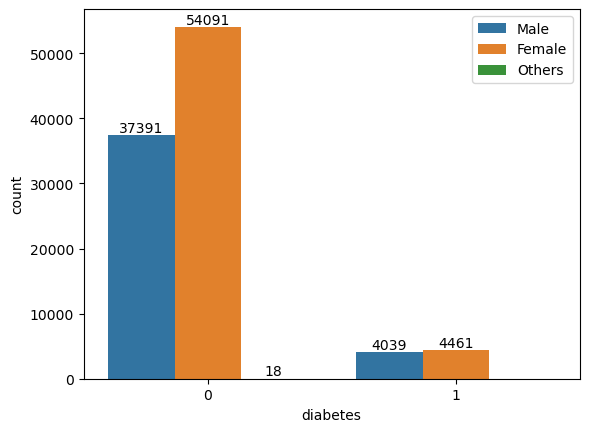

In [345]:
# to create a countplot with Seaborn and label the bars with counts 
gen=sns.countplot(x='diabetes',data=df2,hue='gender')

for bars in gen.containers:
    gen.bar_label(bars)

plt.legend(["Male", "Female" , "Others"],  loc ="upper right")

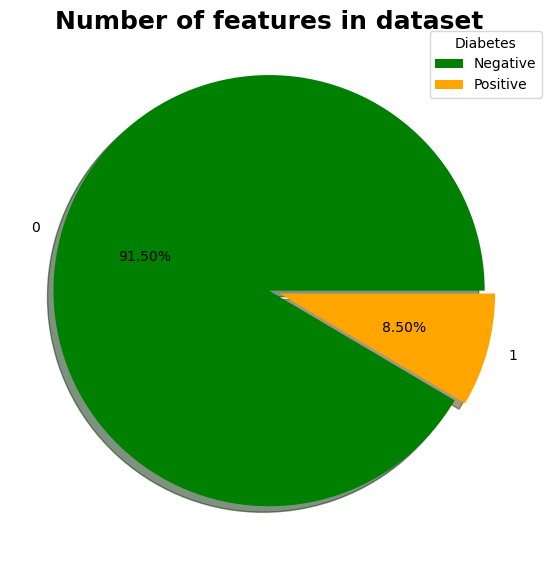

In [346]:
# to create a pie chart to visualize the distribution of diabetes labels (0 for negative and 1 for positive)using Matplotlib.
labels = [0, 1]
size = df2['diabetes'].value_counts()
colors = [ 'green', 'orange']
explode = [0.05, 0]
plt.figure(figsize=(8,7))
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%", shadow = True)
plt.suptitle("Number of features in dataset", y=0.9, size=18,weight="bold")
plt.legend(["Negative", "Positive"],  title="Diabetes")
plt.show()

# Exploratory Data Analysis (EDA) to check the correlation between features.

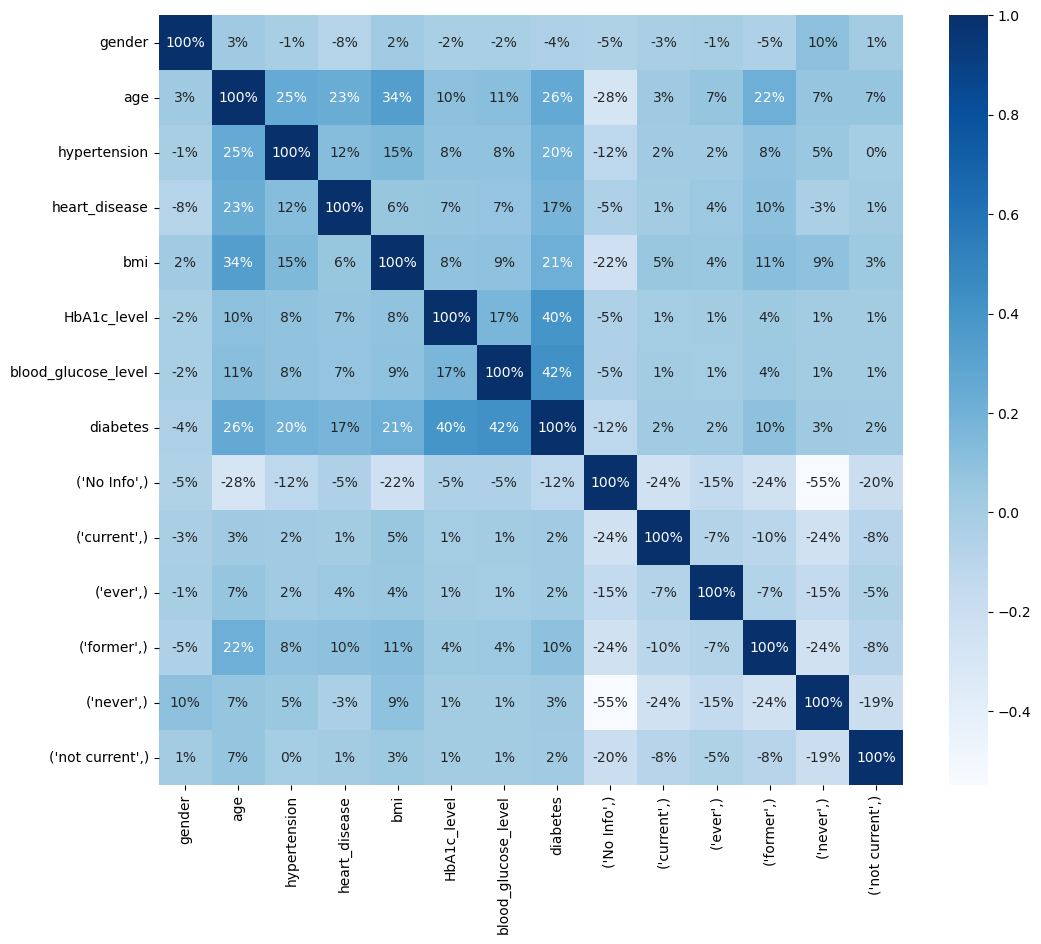

In [347]:
# creating a heatmap of the correlation matrix using Seaborn and Matplotlib.
axis = plt.figure(figsize=(12,10))
sns.heatmap(df2.corr() , annot= True , cmap = "Blues" , fmt=".0%")
plt.show()

# Feature Scaling

In [348]:
# StandardScaler standardize feature ensuring they have a mean of 0 and a standard deviation of 1.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df2.drop("diabetes" , axis=1))
X= scaler.transform(df2.drop("diabetes" , axis=1))
Y= df2["diabetes"]

C:\Users\prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [349]:
# splitting dataset into training and testing sets.
from sklearn.model_selection import train_test_split
X_train , X_test ,Y_train, Y_test=train_test_split(X,Y,test_size=0.10 , random_state=0)

# Classification

In [350]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [351]:
# evaluating different ML models and store their accuracy scores and names in a list

acc=[]
model_name=['Logistic Regression','Decision Tree','Perceptron','Random Forest','K Nearest Neighbor', 'Naive Bayes', 'Voting Classifier']

# Logistic Regression

In [352]:
# creating LogisticRegression model having specific parameters :
# multinomial: handle multiple class prediction problems
# saga: Stochastic Average Gradient Descent,iteratively update model weights during training.

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000)
model.fit(X_train, Y_train.values.ravel())

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga')

In [353]:
# to make predictions on the test dataset
y_pred=model.predict(X_test)

In [354]:
# calculating accuracy of model's predictions and then appending the accuracy score to a list
acc_lr=accuracy_score(Y_test,y_pred)
acc.append(acc_lr)
acc_lr

0.9613

In [355]:
#  to compute the confusion matrix 
print(confusion_matrix(Y_test,y_pred))

[[9050   91]
 [ 296  563]]


# Decision Tree Classifier

In [356]:
# creating DecisionTreeClassifier having parameter: 'gini' measures impurity by Gini index, splite nodes to minimize class impurity 

from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='gini',max_depth=1000)
clf.fit(X_train, Y_train.values.ravel())

DecisionTreeClassifier(max_depth=1000)

In [357]:
# to make predictions on the test dataset
y_pred=clf.predict(X_test)

In [358]:
#  to compute the confusion matrix 
print(confusion_matrix(Y_test,y_pred))

[[8904  237]
 [ 198  661]]


In [359]:
# calculating accuracy of model's predictions and then appending the accuracy score to a list
acc_decisionT=accuracy_score(Y_test,y_pred)
acc.append(acc_decisionT)
acc_decisionT

0.9565

# Perceptron

In [360]:
#  creating Perceptron Model
from sklearn.linear_model import Perceptron
clf3=Perceptron()
clf3.fit(X_train, Y_train.values.ravel())

Perceptron()

In [361]:
# to make predictions on the test dataset
y_pred=clf3.predict(X_test)

In [362]:
#  to compute the confusion matrix 
confusion_matrix(Y_test,y_pred)

array([[8641,  500],
       [ 259,  600]], dtype=int64)

In [363]:
# calculating accuracy of model's predictions and then appending the accuracy score to a list
acc_per=accuracy_score(Y_test,y_pred)
acc.append(acc_per)
acc_per

0.9241

# Random Forest Classifier

In [364]:
# creating random forest classifier model consist of 20 decision trees(n_estimators) and measure of impurity in dataset(gini). 

from sklearn.ensemble import RandomForestClassifier
cl_random=RandomForestClassifier(n_estimators=20,criterion='gini',max_depth=1000)
cl_random.fit(X_train, Y_train.values.ravel())

RandomForestClassifier(max_depth=1000, n_estimators=20)

In [365]:
# to make predictions on the test dataset
y_pred=cl_random.predict(X_test)

In [366]:
#  to compute the confusion matrix 
print(confusion_matrix(Y_test,y_pred))

[[9100   41]
 [ 247  612]]


In [367]:
# calculating accuracy of model's predictions and then appending the accuracy score to a list
acc_rfc=accuracy_score(Y_test,y_pred)
acc.append(acc_rfc)
acc_rfc

0.9712

# K Nearest Neighbors

In [368]:
# creating a k nearsest neighbors model such that the number of neighbors to consider when making predictions is k = 5.

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [369]:
# to make the predictions
y_pred=knn.predict(X_test)

C:\Users\prath\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [370]:
#  to compute the confusion matrix 
print(confusion_matrix(Y_test,y_pred))

[[9074   67]
 [ 313  546]]


In [371]:
# calculating accuracy of model's predictions and then appending the accuracy score to a list
acc_knn=accuracy_score(Y_test,y_pred)
acc.append(acc_knn)
acc_knn

0.962

# Naive Bayes Classifier

In [372]:
# creating a Gaussian Naive Bayes Classifier model

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)

GaussianNB()

In [373]:
# to make the predictions
y_pred=nb.predict(X_test)

In [374]:
print(confusion_matrix(Y_test,y_pred))

[[8429  712]
 [ 272  587]]


In [375]:
# calculating accuracy of model's predictions and then appending the accuracy score to a list
acc_nb=accuracy_score(Y_test,y_pred)
acc.append(acc_nb)
acc_nb

0.9016

# Enemble Learning: Voting Classifier

In [376]:
# create an ensemble model that combines the predictions of several individual classifiers(Random Forest, Decision Tree, Naive Bayes, K Nearest Neighbors, Perceptron, Logistic Regression)
# such that the class label with the most votes will be the final prediction (voting='hard')

from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=[('Random Forest',cl_random),('Decision Tree',clf),('Naive Bayes Classifier',nb),('K Nearest Neighbors',knn),('Perceptron',clf3),("Logistic Regression",model )], voting='hard',weights=[1,1,1,1,1,1])
vc.fit(X_train,Y_train)

VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(max_depth=1000,
                                                     n_estimators=20)),
                             ('Decision Tree',
                              DecisionTreeClassifier(max_depth=1000)),
                             ('Naive Bayes Classifier', GaussianNB()),
                             ('K Nearest Neighbors', KNeighborsClassifier()),
                             ('Perceptron', Perceptron()),
                             ('Logistic Regression',
                              LogisticRegression(max_iter=1000,
                                                 multi_class='multinomial',
                                                 solver='saga'))],
                 weights=[1, 1, 1, 1, 1, 1])

In [377]:
# to make the predictions
y_pred=vc.predict(X_test)

C:\Users\prath\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [378]:
#  to compute the confusion matrix 
print(confusion_matrix(Y_test,y_pred))

[[9098   43]
 [ 288  571]]


In [379]:
# calculating accuracy of model's predictions and then appending the accuracy score to a list
acc_vc=accuracy_score(Y_test,y_pred)
acc.append(acc_vc)
acc_vc

0.9669

# Comparison Of Classification Models Based On Their Accuracy Scores

In [380]:
print(acc)

[0.9613, 0.9565, 0.9241, 0.9712, 0.962, 0.9016, 0.9669]


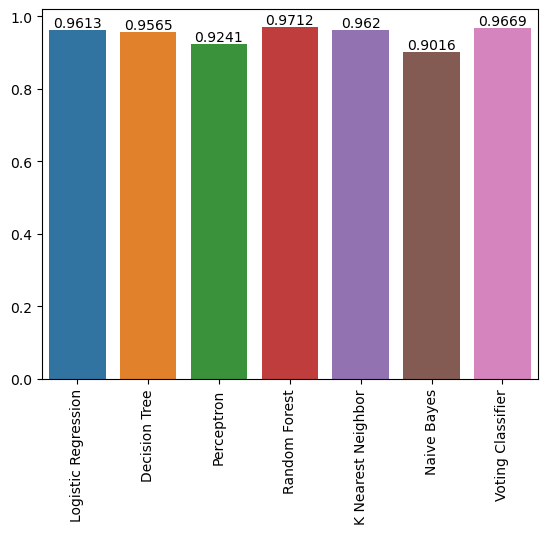

In [381]:
# to create a bar plot to visualize the accuracy scores of different machine learning models
ax = sns.barplot(x=model_name, y=acc)
for i, height in enumerate(acc):
    ax.text(i, height, str(height), ha='center', va='bottom')
plt.xticks(rotation=90)
plt.show()